# Changer l'environement de l'exécution

In [1]:
!nvidia-smi

Sat Jul 27 13:42:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Installer et importer toutes les bibliothèques requièrent

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.8 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 15.5 MB/s eta 0:00:00


In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


# Importer la base de donnée

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZzahPqDI2tzMfDWM6Hq8")
project = rf.workspace("detection-hfuet").project("detection-necem")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detection-2 in yolov9:: 100%|██████████| 722/722 [00:00<00:00, 8549.82it/s]


# Entrainer le modéle en choisissant la version utilisée (yolov10s)

In [7]:
%cd {HOME}

!yolo task=detect mode=train epochs=25 batch=8 plots=True \
model={HOME}/weights/yolov10s.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.66 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10s.pt, data=/content/detection-2/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

# Afficher les résultat de l'entrainement

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch571.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch572.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1722087902.dffe4af16aa8.2029.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch570.jpg


In [10]:
from IPython.display import Image

/content


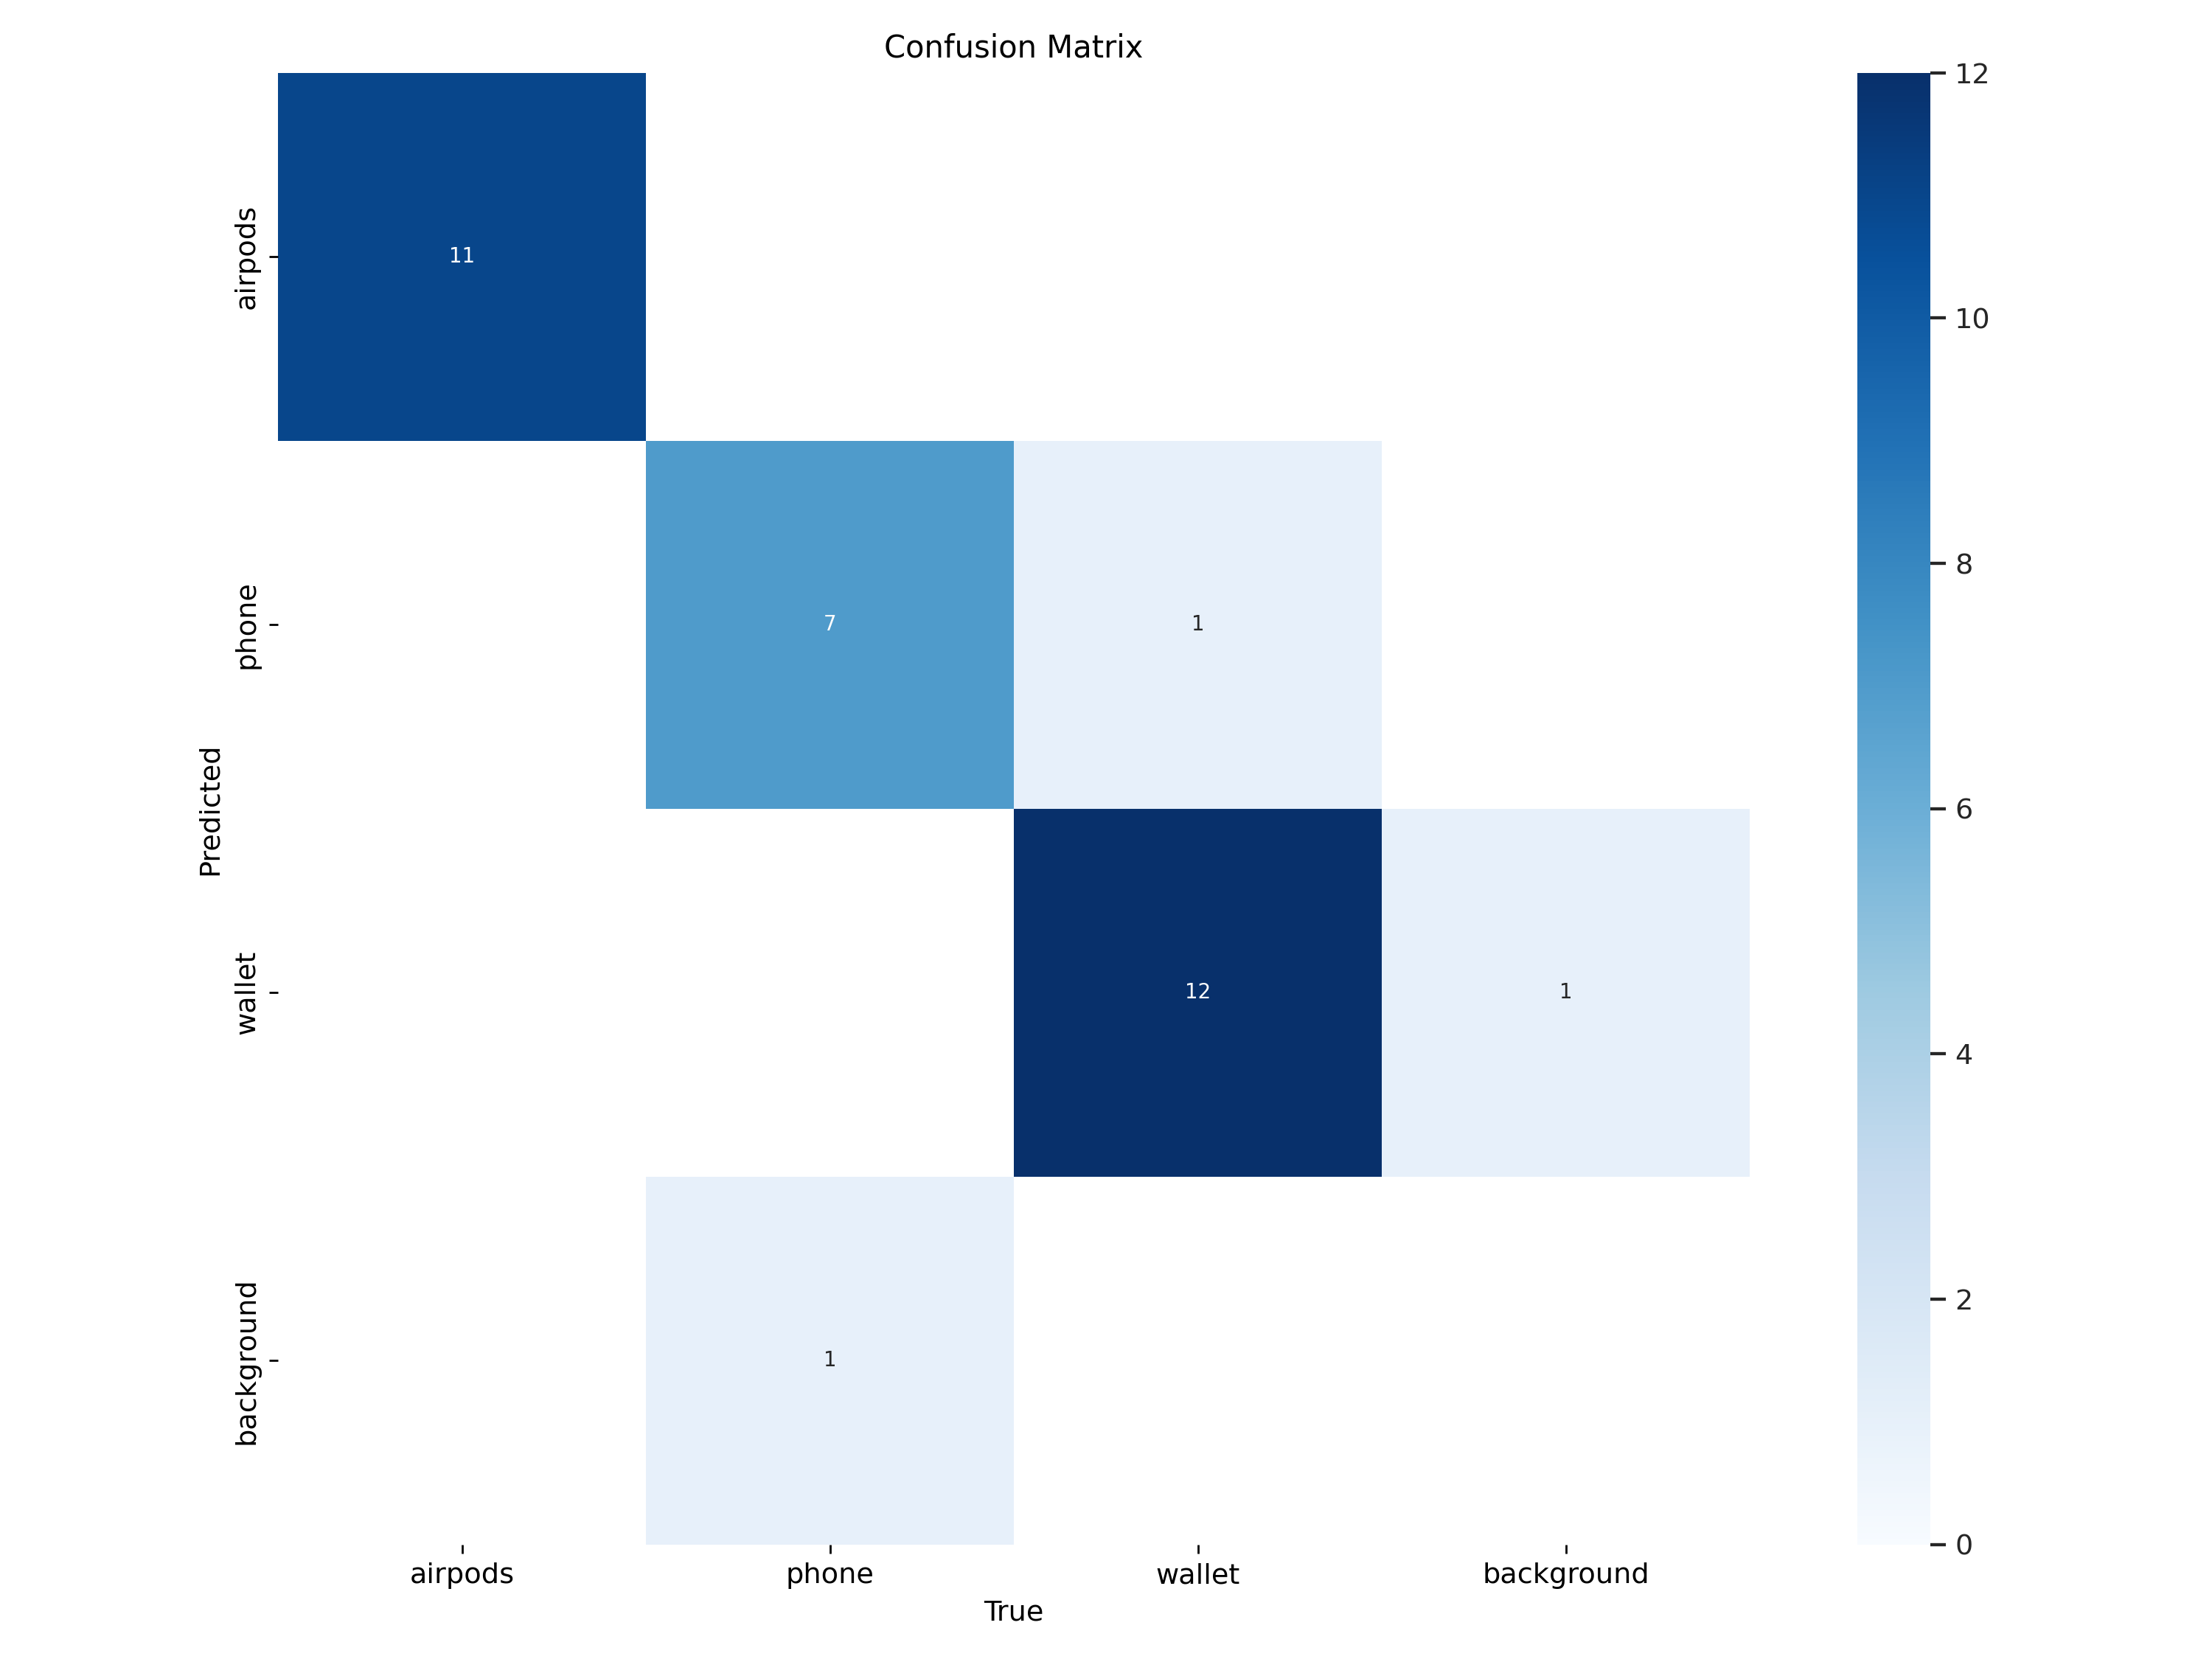

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


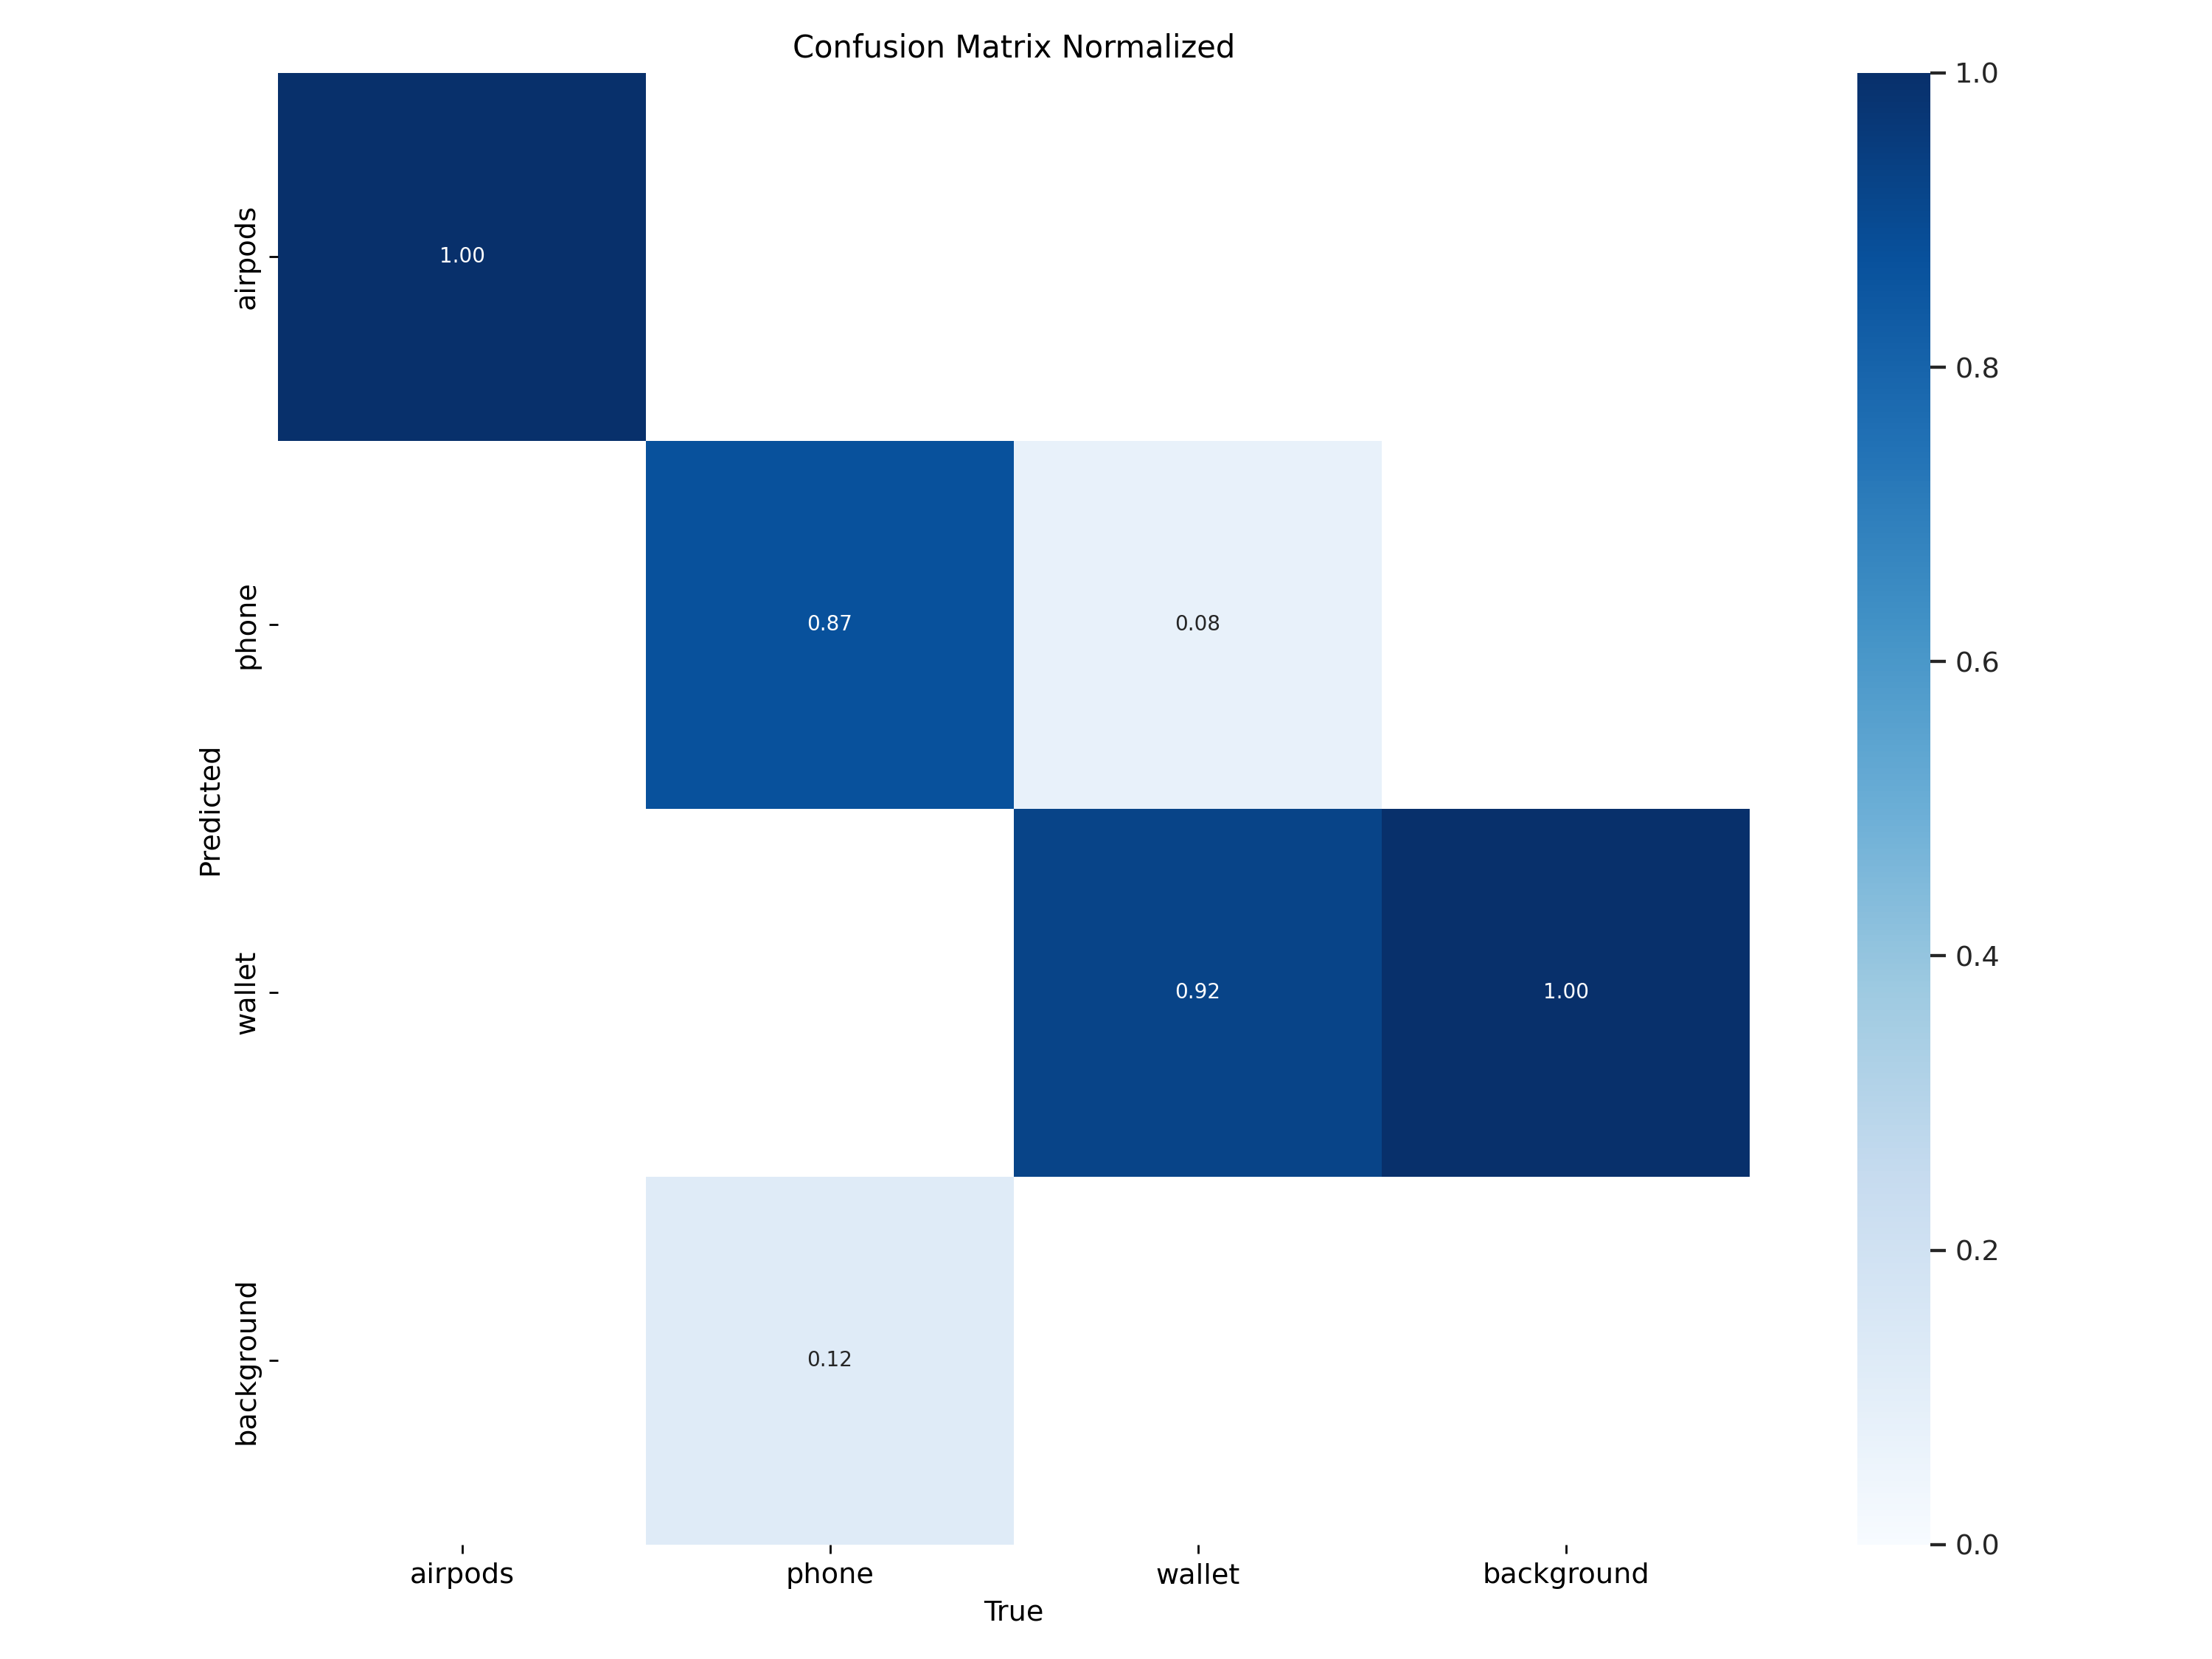

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content


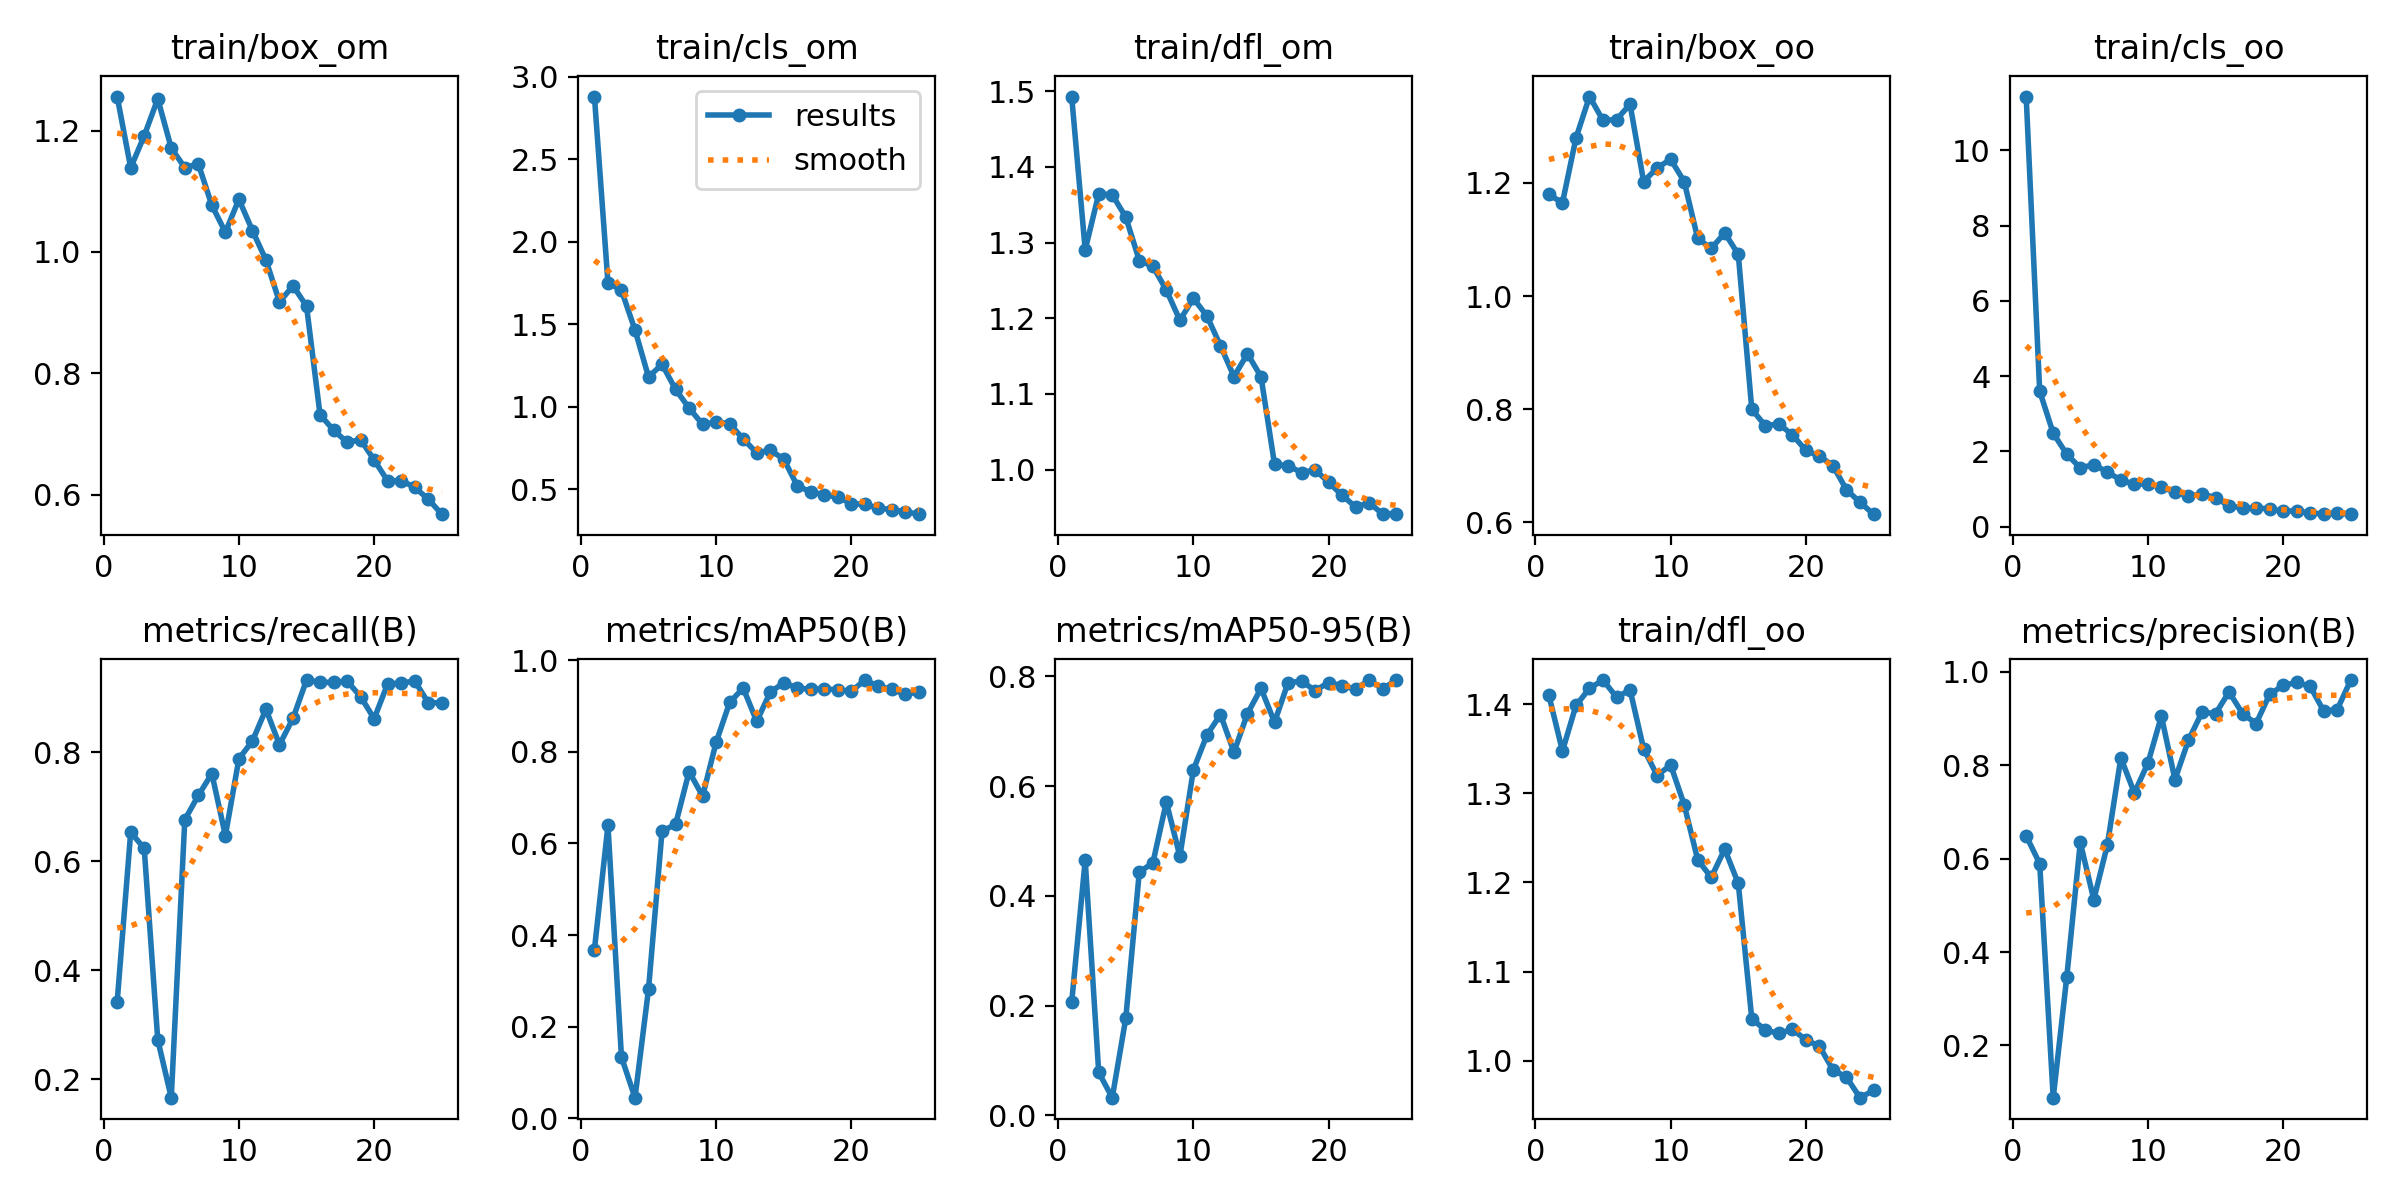

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

**Interprétation :**

*   On remarque que la matrice de corrélation entre les classes **[ Background (l'arrière- plan) , Wallet (portefeuille) , Phone (portable) et Airpods]** qu'il y a une confusion pour le modéle de distinguer entre les deux classes "Background" et "Wallet".
*   Et en ce qui concerne les metrics pour la phase d'entrainement , ils présentent un bon résultat.



# Tester le modéle en utilisant une vidéo

In [8]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model=/content/runs/detect/train/weights/best.pt source=/content/video.mp4

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs

video 1/1 (frame 1/1409) /content/video.mp4: 384x640 (no detections), 188.4ms
video 1/1 (frame 2/1409) /content/video.mp4: 384x640 (no detections), 22.2ms
video 1/1 (frame 3/1409) /content/video.mp4: 384x640 (no detections), 17.2ms
video 1/1 (frame 4/1409) /content/video.mp4: 384x640 (no detections), 17.0ms
video 1/1 (frame 5/1409) /content/video.mp4: 384x640 (no detections), 19.8ms
video 1/1 (frame 6/1409) /content/video.mp4: 384x640 (no detections), 19.7ms
video 1/1 (frame 7/1409) /content/video.mp4: 384x640 (no detections), 20.4ms
video 1/1 (frame 8/1409) /content/video.mp4: 384x640 (no detections), 11.4ms
video 1/1 (frame 9/1409) /content/video.mp4: 384x640 (no detections), 12.3ms
video 1/1 (frame 10/1409) /content/video.mp4: 384x640 (no detections), 12.4ms
video 1/1 (frame 11/1409) /content/video.mp4: 38

# Afficher les résultats de détection

**Note**
*   **Les résultats sont enregistrer dans le répertoire 'runs/detect/predict'**




**Remarque :**

*   Les objets existant dans cette video sont bien detectés avec présence d'un certain erreur ce qui nous montre qu'il y a pas d'overfitting dans la phase d'entrainement.
*   Le faite d'augmenter la taille du la base de donnée peut améliorer les résultats.




In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!rsync -av --exclude='drive' ./ /content/drive/MyDrive/detection

sending incremental file list
./
video.mp4
yolov8n.pt
.config/
.config/.last_opt_in_prompt.yaml
.config/.last_survey_prompt.yaml
.config/.last_update_check.json
.config/active_config
.config/config_sentinel
.config/default_configs.db
.config/gce
.config/configurations/
.config/configurations/config_default
.config/logs/
.config/logs/2024.07.25/
.config/logs/2024.07.25/13.20.06.295036.log
.config/logs/2024.07.25/13.20.29.321805.log
.config/logs/2024.07.25/13.20.40.968961.log
.config/logs/2024.07.25/13.20.42.212977.log
.config/logs/2024.07.25/13.20.53.834518.log
.config/logs/2024.07.25/13.20.54.512261.log
.ipynb_checkpoints/
detection-2/
detection-2/README.dataset.txt
detection-2/README.roboflow.txt
detection-2/data.yaml
detection-2/test/
detection-2/test/images/
detection-2/test/images/opencv_frame_0_png.rf.c6e0e2cc0a19ea97524fa802ee31bd59.jpg
detection-2/test/images/opencv_frame_108_png.rf.fc85b0670e0f40d70c41425ca23a043d.jpg
detection-2/test/images/opencv_frame_112_png.rf.1795bf0dcd26